In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeseries.data import Data
from timeseries.constants import *

In [2]:
data_class = Data()

train_len, data = data_class.fwd()

[*********************100%%**********************]  1 of 1 completed


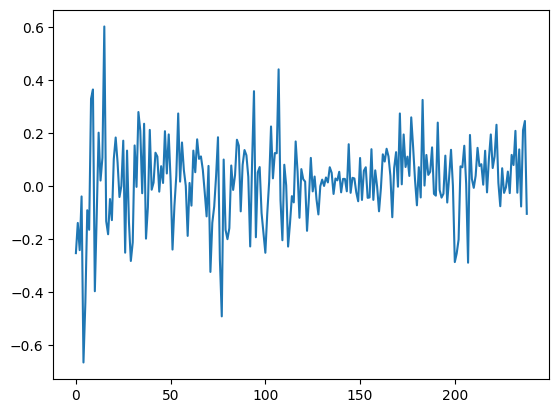

In [3]:
plt.plot(data)

In [4]:
train, test = data[:train_len], data[train_len:]

In [5]:
X = []
Y = []


T = PREV                 

num_records = len(train)

for i in range(num_records - T):
    X.append(train[i:i+T])
    Y.append(train[i+T])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

In [6]:
output_dim = 1
input_dim = PREV

bptt_truncate = 5
min_clip_value = -2
max_clip_value = 2

In [7]:
from timeseries.model import MyRNN


model = MyRNN(input_dim, 
              HIDDEN_SIZE, 
              output_dim, 
              bptt_truncate, 
              LR, 
              max_clip_value, 
              min_clip_value)

model.train(X, Y, EPOCHS)

Epoch:  1 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1978d50>
Epoch:  2 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1978e70>
Epoch:  3 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae19793b0>
Epoch:  4 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1978f90>
Epoch:  5 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1978db0>
Epoch:  6 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae19791d0>
Epoch:  7 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1978b10>
Epoch:  8 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1979050>
Epoch:  9 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1978330>
Epoch:  10 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1978c30>
Epoch:  11 , Loss:  <built-in method item of numpy.ndarray object at 0x7ffae1979110>
Epoch:  12 , Loss:  <built-in method item of numpy.ndarray object at 0x7ff

In [8]:
init = train[-T:]
init = list([el] for el in init)
init = np.array(init)

preds = model.predict(init, len(test))

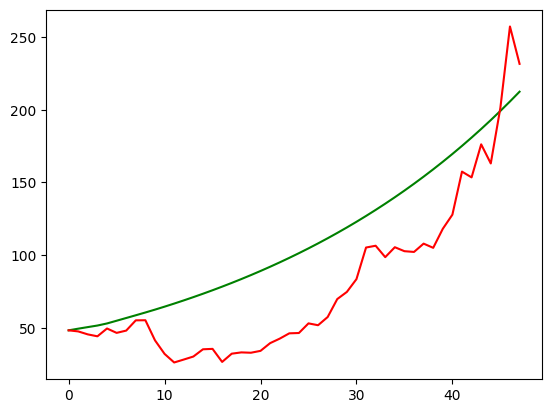

In [9]:
preds = data_class.bkwd(preds)
test = data_class.bkwd(test)

plt.plot(preds, 'g')
plt.plot(test, 'r')
plt.show()

In [10]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(preds, test))

38.281426861169976